In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from ipypublish import nb_setup

In [2]:
df = pd.read_csv('C:/Users/yssg9187/Desktop/20-2/3. 응용자료분석/D_data/PRICE_SEOUL.csv')

In [3]:
df

,YYM1,CITY_CODE,GU_CODE2,BUILT_YR,SIZE,UNIT,PRICE
0,200601,11,1111,1983,93.40,A11110117Z01000000B1983S093F01,29500
1,200601,11,1111,1998,57.18,A11110133Z00300006B1998S057F01,15741
2,200601,11,1111,1998,78.23,A11110133Z00300006B1998S078F01,21535
3,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F01,23198
4,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F02,23198
...,...,...,...,...,...,...,...
909082,201712,11,1174,1997,59.86,A11740109Z05280000B1997S059F02,45000
909083,201712,11,1174,1999,59.63,A11740109Z05660000B1999S059F02,45500
909084,201712,11,1174,2009,84.99,A11740109Z05700000B2009S084F02,68000
909085,201712,11,1174,2009,84.74,A11740110Z06730000B2009S084F02,56000


###  1. 제공한 주택가격실거래 데이터에서 본인이 거주하고 있는 구(또는 관심있는 구)의 자료를 추출합니다.

In [4]:
df1 = df[df['GU_CODE2'].isin([1111])] #종로구
df1

,YYM1,CITY_CODE,GU_CODE2,BUILT_YR,SIZE,UNIT,PRICE
0,200601,11,1111,1983,93.40,A11110117Z01000000B1983S093F01,29500
1,200601,11,1111,1998,57.18,A11110133Z00300006B1998S057F01,15741
2,200601,11,1111,1998,78.23,A11110133Z00300006B1998S078F01,21535
3,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F01,23198
4,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F02,23198
...,...,...,...,...,...,...,...
907449,201712,11,1111,2014,15.55,A11140163Z01190000B2014S015F02,16900
907450,201712,11,1111,2013,16.37,A11140165Z07870000B2013S016F02,14500
907451,201712,11,1111,2008,59.91,A11140165Z25450000B2008S059F02,49000
907452,201712,11,1111,2006,70.81,A11140168Z02150000B2006S070F02,44500


### 2.본인이 거주하고 있는 구(또는 관심있는 구)아파트의 평당가격, 아파트연령에 대한 기초통계량을 제시하고 설명합니다.

In [5]:
df1['PRICE_PYUNG'] = df1['PRICE']/(df1['SIZE']/3.33)
df1['DURATION'] = 2020 - df1['BUILT_YR']
df1

<ipython-input-5-81a0e93973d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PRICE_PYUNG'] = df1['PRICE']/(df1['SIZE']/3.33)
<ipython-input-5-81a0e93973d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DURATION'] = 2020 - df1['BUILT_YR']


,YYM1,CITY_CODE,GU_CODE2,BUILT_YR,SIZE,UNIT,PRICE,PRICE_PYUNG,DURATION
0,200601,11,1111,1983,93.40,A11110117Z01000000B1983S093F01,29500,1051.766595,37
1,200601,11,1111,1998,57.18,A11110133Z00300006B1998S057F01,15741,916.710913,22
2,200601,11,1111,1998,78.23,A11110133Z00300006B1998S078F01,21535,916.675828,22
3,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F01,23198,916.797294,22
4,200601,11,1111,1998,84.26,A11110133Z00300006B1998S084F02,23198,916.797294,22
...,...,...,...,...,...,...,...,...,...
907449,201712,11,1111,2014,15.55,A11140163Z01190000B2014S015F02,16900,3619.099678,6
907450,201712,11,1111,2013,16.37,A11140165Z07870000B2013S016F02,14500,2949.602932,7
907451,201712,11,1111,2008,59.91,A11140165Z25450000B2008S059F02,49000,2723.585378,12
907452,201712,11,1111,2006,70.81,A11140168Z02150000B2006S070F02,44500,2092.712894,14


In [6]:
df1.describe()

,YYM1,CITY_CODE,GU_CODE2,BUILT_YR,SIZE,PRICE,PRICE_PYUNG,DURATION
count,15948.000000,15948.0,15948.0,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000
mean,201230.576812,11.0,1111.0,2001.270191,82.563870,48957.585026,1954.737318,18.729809
std,372.800845,0.0,0.0,7.941028,33.500615,27474.836383,567.761448,7.941028
min,200601.000000,11.0,1111.0,1965.000000,12.090000,2300.000000,310.273475,3.000000
25%,200904.000000,11.0,1111.0,1999.000000,59.940000,31500.000000,1550.000000,13.000000
50%,201309.000000,11.0,1111.0,2002.000000,84.760000,45000.000000,1981.208765,18.000000
75%,201601.000000,11.0,1111.0,2007.000000,84.970000,59700.000000,2302.862223,21.000000
max,201712.000000,11.0,1111.0,2017.000000,273.970000,420000.000000,5714.402451,55.000000


### 3. 해당구의 아파트의 평당 가격에 대한 히스토그램(전체, 3년(200612, 201112, 201612))을 각각 작성합니다.

In [7]:
house_all = df1[["PRICE_PYUNG"]].to_numpy()

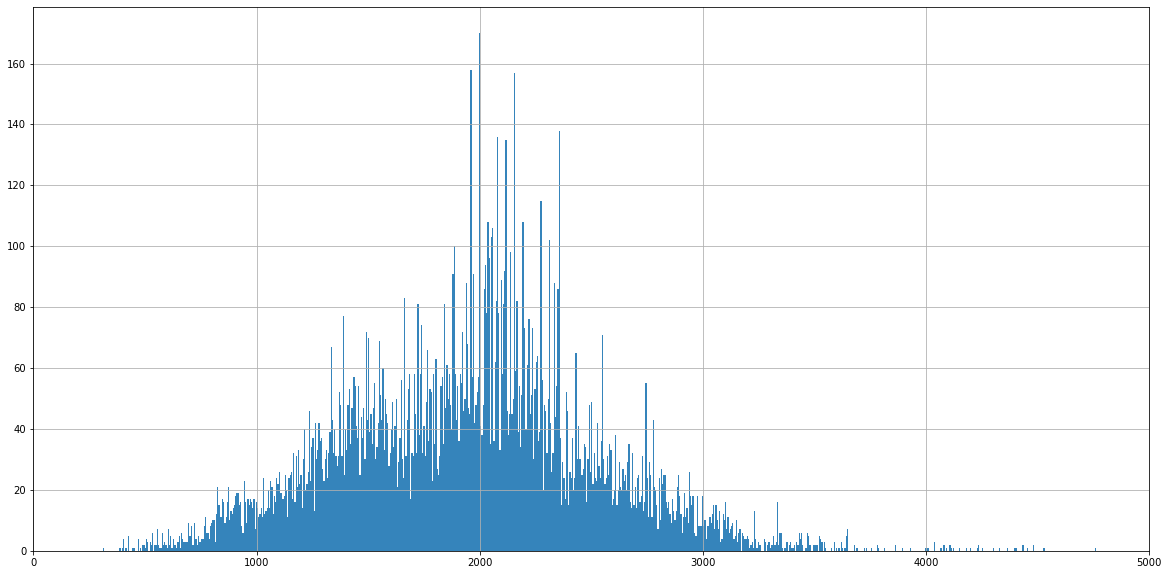

In [8]:
#평당 가격 히스토그램
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(house_all, alpha=0.9, bins=1000)
ax.grid(True)
ax.set_xlim((0,5000))
plt.show()

In [9]:
df200612 = df1[df1['YYM1'] == 200612]
df201112 = df1[df1['YYM1'] == 201112]
df201612 = df1[df1['YYM1'] == 201612]

In [10]:
house_200612 = df200612[["PRICE_PYUNG"]].to_numpy()
house_201112 = df201112[["PRICE_PYUNG"]].to_numpy()
house_201612 = df201612[["PRICE_PYUNG"]].to_numpy()

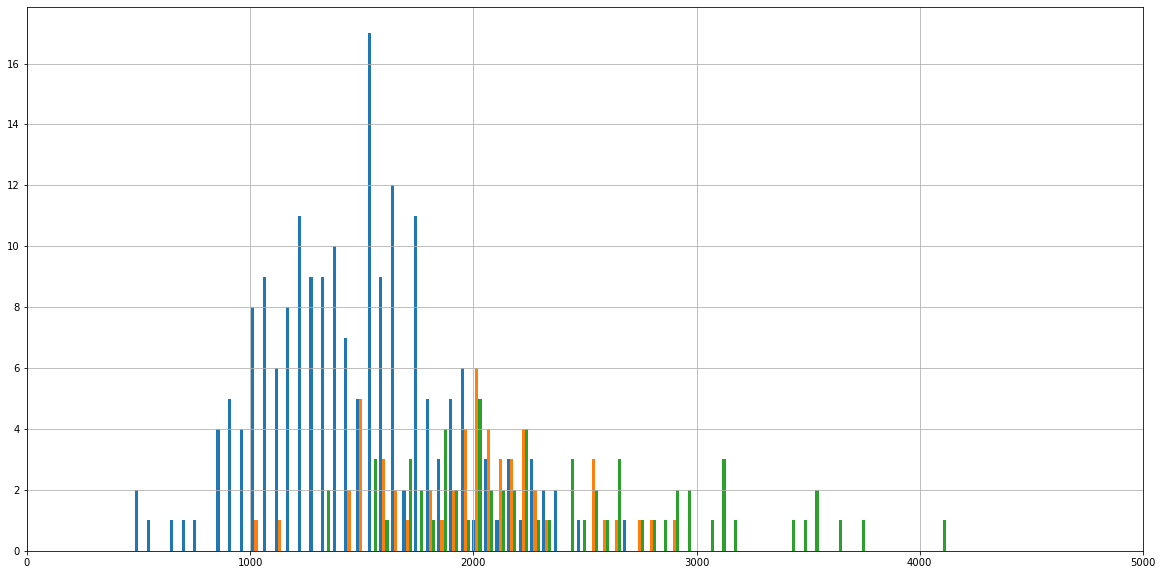

In [11]:
#2006/12, 2011/12, 2016/12 평당 가격 히스토그램

fig, ax = plt.subplots(figsize=(20,10))
ax.hist([house_200612,house_201112, house_201612], alpha=1.0, bins=70)
ax.grid(True)
ax.set_xlim((0,5000))
plt.show()

### 4.해당구의 아파트의 평당가격의 그래프를 시간대별로 표시합니다.

In [12]:
df2=df1.groupby(['YYM1'])["DURATION", 'PRICE_PYUNG'].mean()
df2

<ipython-input-12-e7e76cb52f39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df1.groupby(['YYM1'])["DURATION", 'PRICE_PYUNG'].mean()


,DURATION,PRICE_PYUNG
YYM1,,
200601,22.098361,1274.466424
200602,22.221053,1335.254346
200603,21.464052,1373.288906
200604,21.932773,1345.758519
200605,23.611111,1415.416203
...,...,...
201708,17.230088,2385.619264
201709,15.811321,2635.287916
201710,16.072727,2558.878657


In [13]:
time = pd.date_range('1/1/2006', periods=144, freq='1M') # 1달 단위로 144rows, 1/1/2006부터


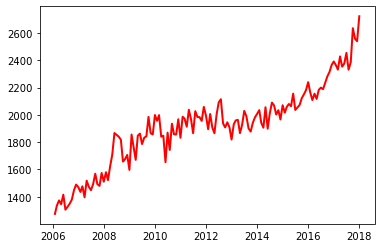

In [14]:
#시간대 별 그래프
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(time, df2["PRICE_PYUNG"],color='red',linewidth=2.0)
plt.show()

### 5. 해당구의 아파트의 연령(오래된 횟수)가 아파트 평당 가격에 어떠한 영향을 미치는지를 회귀분석합니다.

In [15]:
#단순회귀분석 
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
#패키지 분석
house_price = df1[['PRICE_PYUNG', 'DURATION']]
price_model = ols("PRICE_PYUNG ~ DURATION", data=house_price).fit()
print(price_model.summary())

                            OLS Regression Results                            
Dep. Variable:            PRICE_PYUNG   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     6480.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:09:21   Log-Likelihood:            -1.2105e+05
No. Observations:               15948   AIC:                         2.421e+05
Df Residuals:                   15946   BIC:                         2.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2674.5859      9.713    275.371      0.0

### 6. 서울시 아파트가격지수에 주택담보대출금리(MoRate), 거래건수(FREQ)가 미치는 영향을 회귀분석합니다.(package이용한 분석, 매트릭스를 이용한 분석).

In [17]:
#중회귀분석
df = pd.read_csv('C:/Users/yssg9187/Desktop/20-2/3. 응용자료분석/D_data/HPI_SEOUL.csv', encoding='CP949')

In [18]:
df.head()

,YYM1,CITY,CITY_CODE,GU_NAME,GU_CODE2,API_TT0,BaseRate,MoRate,FREQ,A_PSUM,...,LTV,DTI,MV_APT,JAEGO,BUNYANG,N_BUNYANG,IND_INDEX,JTP,LOAN_T,MON
0,200603,서울특별시,11,종로중구,1111,75.245608,4.00,5.46,71,2.559029,...,42.912677,93.255607,4.891421,110,0,277,109.907,48.372,104.381241,3
1,200606,서울특별시,11,종로중구,1111,81.009183,4.25,5.48,58,1.774481,...,43.944172,94.827586,4.891421,0,0,277,99.469,47.454,107.564252,6
2,200609,서울특별시,11,종로중구,1111,81.208640,4.50,5.77,90,2.898839,...,44.425621,94.000000,4.891421,0,0,14,123.203,47.670,110.666410,9
3,200612,서울특별시,11,종로중구,1111,88.068940,4.50,5.88,99,3.181162,...,50.340131,95.151515,4.891421,0,136,6,128.718,43.811,101.843742,12
4,200703,서울특별시,11,종로중구,1111,86.507762,4.50,6.20,68,1.955622,...,50.951451,48.890836,6.083816,0,112,0,110.893,42.987,107.877226,3


#### 패키지 분석

In [19]:
#패키지 분석
edu_model = ols("API_TT0 ~ MoRate + FREQ", data=df).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                API_TT0   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           5.42e-49
Time:                        17:09:21   Log-Likelihood:                -4282.0
No. Observations:                1152   AIC:                             8570.
Df Residuals:                    1149   BIC:                             8585.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.8432      1.299     88.392      0.0

#### 매트리스 북석

In [20]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
BLD = df[['MoRate', 'FREQ']]

In [21]:
X = BLD.values
X

array([[  5.46,  71.  ],
       [  5.48,  58.  ],
       [  5.77,  90.  ],
       ...,
       [  3.22, 362.  ],
       [  3.24, 193.  ],
       [  3.42,  82.  ]])

In [22]:
X.shape[0]

1152

In [23]:
ones = np.ones(X.shape[0])

In [24]:
X_mat = np.column_stack((ones, X))
X_mat

array([[  1.  ,   5.46,  71.  ],
       [  1.  ,   5.48,  58.  ],
       [  1.  ,   5.77,  90.  ],
       ...,
       [  1.  ,   3.22, 362.  ],
       [  1.  ,   3.24, 193.  ],
       [  1.  ,   3.42,  82.  ]])

In [25]:
df.columns

Index(['YYM1', 'CITY', 'CITY_CODE', 'GU_NAME', 'GU_CODE2', 'API_TT0',
       'BaseRate', 'MoRate', 'FREQ', 'A_PSUM', 'SEOUL', 'METRO', 'LTV', 'DTI',
       'MV_APT', 'JAEGO', 'BUNYANG', 'N_BUNYANG', 'IND_INDEX', 'JTP', 'LOAN_T',
       'MON'],
      dtype='object')

In [26]:
Y = df['API_TT0'].values

In [27]:
Y.shape

(1152,)

In [28]:
X_mat.T

array([[  1.  ,   1.  ,   1.  , ...,   1.  ,   1.  ,   1.  ],
       [  5.46,   5.48,   5.77, ...,   3.22,   3.24,   3.42],
       [ 71.  ,  58.  ,  90.  , ..., 362.  , 193.  ,  82.  ]])

In [29]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
beta_hat

array([114.8432,  -3.6333,  -0.0138])

In [30]:
Y_fitted = X_mat @ beta_hat

In [31]:
e = Y - Y_fitted 


In [32]:
e.shape

(1152,)

In [33]:
e.T @ e

114174.19336739123

In [34]:
n = len(e)

In [35]:
k = beta_hat.shape[0]
k

3

In [36]:
sigma_hat2 = e.T @ e/(n-k)
sigma_hat2

99.36831450599759

In [37]:
XtX_inv =  np.linalg.inv(X_mat.T.dot(X_mat))


In [38]:
cov = sigma_hat2 * XtX_inv 
cov

array([[ 1.688 , -0.2747, -0.0022],
       [-0.2747,  0.054 ,  0.0002],
       [-0.0022,  0.0002,  0.    ]])

In [39]:
se = np.sqrt(cov)
se

<ipython-input-39-d8b706efef78>:1: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(cov)


array([[1.2992,    nan,    nan],
       [   nan, 0.2325, 0.0128],
       [   nan, 0.0128, 0.003 ]])

In [40]:
beta_hat.shape

(3,)

In [41]:
se1 = np.zeros(k)
se1

array([0., 0., 0.])

In [42]:
for i in range(k):
    se1[i,]= se[i,i]

se1

array([1.2992, 0.2325, 0.003 ])

In [43]:
lb = beta_hat -  2 * se1
hb = beta_hat +  2 * se1

In [44]:
lb

array([112.2447,  -4.0982,  -0.0199])

In [45]:
hb

array([117.4417,  -3.1684,  -0.0078])

In [46]:
t = beta_hat/se1
t

array([ 88.3922, -15.6298,  -4.5529])

In [47]:
from scipy import stats
df = len(e)- k 

p0 = np.zeros(k)

for i in range(k):
    if t[i] > 0:
        p0[i,] = (1 - stats.t.cdf(t[i],df=df))*2
    else:
        p0[i,] = stats.t.cdf(t[i],df=df) * 2
        
p0

array([0., 0., 0.])

#### 가. 두 방법에 의한 계수값, 신뢰구간, t값, p값을 보이고 서로 일치하는지 확인합니다. 

package와 matrix를 통한 분석값이 서로 같습니다.



#### 나.결과를 해석합니다.

P값이 0이고 상관관계값이 신뢰구간 안에 잘 들어있기 때문에 도출결과가 유의미하다고 볼 수 있습니다. 아파트 가격지수에 대한 주택담보대출금리(MoRate)의 상관계가 -3.6333입니다. 이 말은 아파트 가격지수가 1오르면 주택담보대출금리가 약 -3.6만큼 떨어진다는 이야기입니다. 아파트 가격지수에 대한 거래건수(FREQ)는 -0.0138으로 약한 음의 관계를 띄고 있으나 지대한 영향이 있다고 보기 힘듭니다.